In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import gc
import glob
from itertools import cycle
from datetime import datetime

In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import plotly.express as px

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
import matplotlib.patches as patches
import seaborn as sns

In [5]:
import torch
from torchvision import transforms as T
import atomai as aoi
from atomai.predictors import Locator
import cv2

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [6]:
# Custom modules
import sys

sys.path.append("../NanoscoPy/")
from nanoscopy.utilities import dialog_askfilename, dialog_askdirectory
# from classifier.datasets import WSe2DefectDataset, WSe2DefectDataset_VIA

In [7]:
from classifier.datasets.WSe2_defect_dataset import WSe2DefectDataset_VIA
from classifier.datasets.sxm_dataset import SXM_Dataset
from classifier.trainers.defect_trainer import train_ensemble, read_train_data, split_train_data, eval_ensemble
from classifier.predict import predict_dataset, fit_defect_clusters, plot_detection_hists, plot_calc_defect_properties, plot_detection_kdes, get_total_area, detect_defects_VIAdataset, detect_defects
from classifier.utils import collate_fn

True
1
0
NVIDIA GeForce RTX 3070


In [8]:
plot_out_path = "output/plots"

Training ensemble models (strategy = 'from_scratch')

Ensemble model 1
Epoch 1/500 ... Training loss: 1.4829 ... Test loss: 1.0778 ... Train Accuracy: 0.1758 ... Test Accuracy: 0.3138 ... GPU memory usage: 7820/8192
Epoch 100/500 ... Training loss: 0.5717 ... Test loss: 0.5398 ... Train Accuracy: 0.5561 ... Test Accuracy: 0.5237 ... GPU memory usage: 7780/8192
Epoch 200/500 ... Training loss: 0.2132 ... Test loss: 0.2171 ... Train Accuracy: 0.616 ... Test Accuracy: 0.5313 ... GPU memory usage: 7780/8192
Epoch 300/500 ... Training loss: 0.1447 ... Test loss: 0.2019 ... Train Accuracy: 0.5838 ... Test Accuracy: 0.4182 ... GPU memory usage: 7780/8192
Epoch 400/500 ... Training loss: 0.0832 ... Test loss: 0.1102 ... Train Accuracy: 0.7083 ... Test Accuracy: 0.5202 ... GPU memory usage: 7781/8192
Epoch 500/500 ... Training loss: 0.0549 ... Test loss: 0.1103 ... Train Accuracy: 0.7162 ... Test Accuracy: 0.5692 ... GPU memory usage: 7780/8192
Model (final state) evaluation loss: 0.0986
Model 

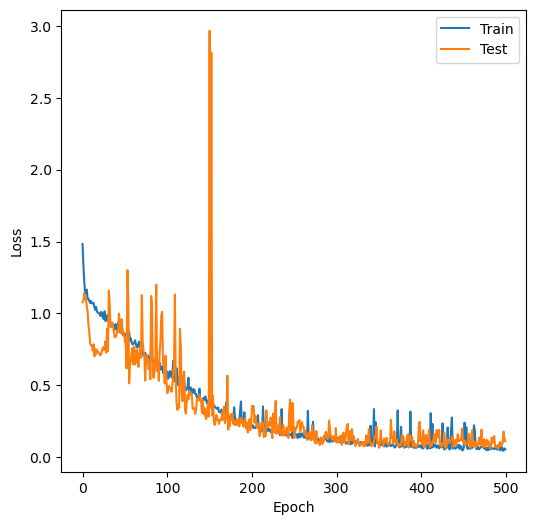

Batch 1/1

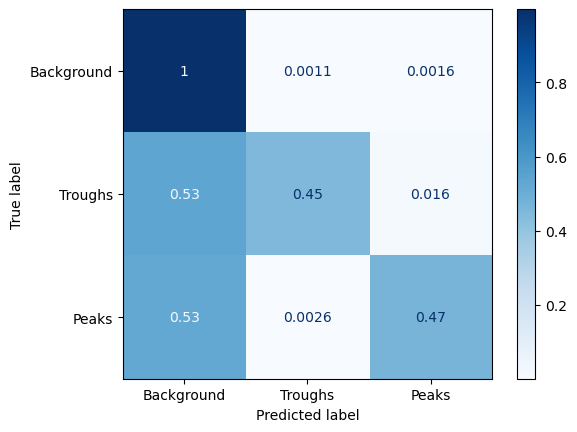

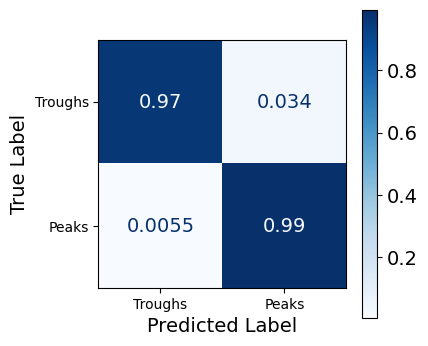

              precision    recall  f1-score   support

  background       0.98      1.00      0.99   6362622
     troughs       0.89      0.45      0.60    125691
       peaks       0.71      0.47      0.57     65287

    accuracy                           0.98   6553600
   macro avg       0.86      0.64      0.72   6553600
weighted avg       0.98      0.98      0.98   6553600



In [9]:
smodel, ensemble, etrainer = train_ensemble(n_models=1, regen_train_data=False, n_epochs=500)

In [10]:
test_path = './datastores/WSe2/STM/STM_data'

In [11]:
dirs = glob.glob(os.path.join(f"{test_path}/*/"))
dirs

[]

In [178]:
for dir_path in dirs:
    date_str = Path(dir_path).name
    sxm_dataset = SXM_Dataset(dir_path, filename_filter="STM")
    test_defect_properties, test_cluster_centers  = predict_dataset(
        smodel, 
        ensemble, 
        sxm_dataset, 
        show_plots=True
    )
    test_defect_properties.to_csv(f'output/{date_str}_defect_detections_raw.csv', index=False)
    del test_defect_properties
    gc.collect()

146 sxm files found in C:/Users/da935101/Datasets/TMDs/WSe2/All/STM_data\2021-11-18\


c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0026851402692390294 Z avg= -2.588765730131848e-16 Z std= 2.9066184560177054e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0019410345135712729 Z avg= -4.527302095963114e-18 Z std= 1.8614679400740715e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

width = 512 with_nm = 100.0 nm per pixel =  0.1953125 temp =  77 noise =  0.0034105325023135753 Z avg= 1.1773933176028048e-16 Z std= 1.240461565470764e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.002720951648233585 Z avg= 4.484144891327225e-16 Z std= 2.916956422748863e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0034826069205727956 Z avg= 1.9149488881915016e-17 Z std= 9.697820387277868e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.003467136362736596 Z avg= -3.2154572999777864e-17 Z std= 1.1009007476744571e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0033340469779853444 Z avg= 8.13505451640839e-17 Z std= 1.0994925745795981e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0034002334950593155 Z avg= -4.557654903489031e-17 Z std= 1.0175376246944405e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0033479118018518283 Z avg= -1.3520629625937197e-16 Z std= 9.596545728196694e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.003215846391616998 Z avg= -3.4314247932585445e-17 Z std= 7.756469059809906e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.00267802838121129 Z avg= -4.982903694727583e-18 Z std= 1.5197209624733474e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033010856118309384 Z avg= -1.4377189764079986e-16 Z std= 9.562687429427962e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003271763121364727 Z avg= -8.166277908858461e-17 Z std= 8.688522115954863e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0027100001681286717 Z avg= -4.570159679981923e-18 Z std= 1.630360390018343e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0015765435837654278 Z avg= -6.077305190673721e-17 Z std= 2.1291766599578177e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0023935481011109353 Z avg= -3.211325597351644e-17 Z std= 1.735714316681748e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0029678319501431085 Z avg= -4.763454829763551e-17 Z std= 1.8700663311798978e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033799722977005207 Z avg= -8.474112237074744e-17 Z std= 1.0996389316254877e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0037448094684408 Z avg= -5.97717273651075e-17 Z std= 7.966778099508332e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003484198883036215 Z avg= -5.902420842411911e-17 Z std= 1.0926369723305684e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003267832303315194 Z avg= 5.534951397866138e-17 Z std= 8.929473806861311e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031795727163995285 Z avg= 7.015133715806109e-17 Z std= 1.8701406358918028e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0026263236764620373 Z avg= 1.6354586095328725e-16 Z std= 3.0798089870607305e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032654142743445682 Z avg= -7.484785646140436e-17 Z std= 1.2464639953665376e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003329172078739054 Z avg= -1.8208618725638845e-16 Z std= 1.4577711471034804e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003244919382244114 Z avg= -7.510735994722519e-17 Z std= 1.1197902578607831e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0034770373361110375 Z avg= 2.5825603330645834e-17 Z std= 7.535114487974805e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003390578791241011 Z avg= 6.178715300781254e-17 Z std= 9.021724425163773e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0035145156700270466 Z avg= 5.099525071792382e-17 Z std= 9.527112484283061e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003180150758220528 Z avg= -1.8915932081995568e-16 Z std= 1.4447442291102284e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002945902837386586 Z avg= -1.32001698319239e-16 Z std= 1.1870469511100048e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032990181052752593 Z avg= -1.2580630551811856e-16 Z std= 7.477986805696422e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002908120489395651 Z avg= 4.9362754653246636e-17 Z std= 1.81154183598281e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033231961584361813 Z avg= -3.845712848744847e-17 Z std= 8.20341317434094e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003525379604570773 Z avg= 1.8010967994524003e-17 Z std= 7.239173025807673e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0026703853315602675 Z avg= -1.9039313063094853e-17 Z std= 1.9268790794031658e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032660927616046955 Z avg= -2.0601257984623982e-16 Z std= 1.0983055438189187e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032639536591866384 Z avg= -3.754716815537383e-16 Z std= 1.550290257690413e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032532139410521516 Z avg= -4.62373463069413e-16 Z std= 1.5964864934132102e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032544416854722196 Z avg= -3.4250508181194316e-16 Z std= 1.8829634100607002e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032555838001810176 Z avg= -4.578017697918322e-16 Z std= 1.7809676709241742e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033143103298759816 Z avg= -2.1244648718024975e-16 Z std= 1.5646187571116493e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003488054623161061 Z avg= 1.8928296346219223e-16 Z std= 1.1934424554149218e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003357917326830765 Z avg= -6.773168631411816e-17 Z std= 1.3327359378278555e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003528100978882938 Z avg= -6.74018768409222e-17 Z std= 1.0150158143871665e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003243971641843133 Z avg= -4.709609693051948e-16 Z std= 1.8570975279454483e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003272164664795056 Z avg= -7.059657501611181e-16 Z std= 1.9878661645946412e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033285573038132803 Z avg= -5.941424265330732e-16 Z std= 1.8077374741932377e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003336633662738753 Z avg= -5.8393134846509525e-16 Z std= 1.656590807597309e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033690008473318146 Z avg= -3.848843412154762e-16 Z std= 1.472596986250662e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003471287040144356 Z avg= 5.896947295661971e-17 Z std= 1.229842107105284e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032018267338830924 Z avg= 2.477261886253267e-16 Z std= 1.4506345697715683e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003282719552395018 Z avg= 2.6075116986924905e-16 Z std= 1.3491698168323818e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003247402023260174 Z avg= -2.4430737148724893e-16 Z std= 1.3070806736384729e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032475307479189943 Z avg= -3.9844338450416957e-16 Z std= 1.4698720782610318e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032469708587254164 Z avg= -3.693019325627273e-16 Z std= 1.4581396710692655e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003193790733651758 Z avg= -5.776822445878727e-16 Z std= 2.0312254871816355e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032600635858726027 Z avg= -4.3392467690443566e-16 Z std= 1.541619776215839e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003201776217431816 Z avg= -3.1863178914433696e-16 Z std= 1.7647102188595185e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003169359093169946 Z avg= -5.3370918893109044e-17 Z std= 1.5477683742234157e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032996079115184267 Z avg= -1.019128048874864e-16 Z std= 1.0807941792276348e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003310564252569489 Z avg= -1.5048632590543453e-16 Z std= 9.857664497058681e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033779582989252144 Z avg= -1.4859123603010689e-16 Z std= 9.429230152023848e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0029573400151753125 Z avg= -9.681388614986898e-17 Z std= 1.5325837223593444e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003268999266686363 Z avg= -1.7499296771031494e-16 Z std= 1.5711055493791023e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003357159505142942 Z avg= -1.0918867847210728e-16 Z std= 1.1070995680709584e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032329259193989283 Z avg= -1.9464679155431791e-16 Z std= 1.5343975633262115e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031133244226988414 Z avg= 4.330120889099259e-17 Z std= 1.815500861831907e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0030832758247405258 Z avg= 2.845073476984511e-17 Z std= 1.745521102870367e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033168933508388333 Z avg= 6.101966923364556e-17 Z std= 9.332020556912847e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.00332591724496337 Z avg= 1.3166139974789366e-18 Z std= 9.861946110701451e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0038731806922479265 Z avg= -9.459042780768267e-17 Z std= 8.123426122935481e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003468877759666665 Z avg= -2.756911549766766e-17 Z std= 9.373610223003027e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033614012834605423 Z avg= 1.3391021704345937e-17 Z std= 1.0547564581711768e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003291343827295269 Z avg= -5.004667025453815e-17 Z std= 1.1833498568542516e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003435254592365156 Z avg= -3.356884529593662e-17 Z std= 1.0837520349887387e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003486276053088902 Z avg= -1.900964370979906e-18 Z std= 1.1435951109150489e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0035116456293041243 Z avg= 9.791027560455164e-18 Z std= 9.794961529852282e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.00345675593102798 Z avg= -2.6818271621757555e-17 Z std= 9.80500937543903e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0035187680530111495 Z avg= 9.07224121154189e-17 Z std= 8.566907201801721e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0035534566446060673 Z avg= -6.035907807051461e-17 Z std= 8.95830203502659e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033808025559302663 Z avg= -1.1405455477580998e-17 Z std= 8.87565218032397e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003237623813471032 Z avg= -1.411443200036957e-17 Z std= 8.494265294264702e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003213447780455529 Z avg= -2.3285578654622168e-17 Z std= 9.270756286531365e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032859208077201147 Z avg= -8.593407639349769e-18 Z std= 8.726481756213023e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032507871023354103 Z avg= -8.942317999332484e-18 Z std= 7.649654417015168e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033208936592578763 Z avg= -3.262147424071289e-17 Z std= 8.268933286565859e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003118188015475363 Z avg= -2.7744157774013922e-17 Z std= 8.105653683126178e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003088264814769702 Z avg= 1.8667287175976553e-17 Z std= 8.71018181012705e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031164152811463722 Z avg= 1.0625787799266655e-17 Z std= 8.516328848382791e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031769139837177322 Z avg= 8.978348663979585e-17 Z std= 8.284531617874707e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032062349375625646 Z avg= 4.905879825593714e-17 Z std= 8.143888266728099e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033759535873932383 Z avg= 7.229944865921296e-17 Z std= 7.775184062550658e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031719976373519357 Z avg= 7.991164443433592e-17 Z std= 7.908799120590955e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033458628853060123 Z avg= -2.447930408795027e-17 Z std= 8.12456159756086e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032703467785289543 Z avg= -1.8564145077998948e-17 Z std= 6.925963758558205e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032238865869275513 Z avg= 2.3391691229066892e-17 Z std= 7.41983272061658e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.00313588186308595 Z avg= -2.8354477978680306e-17 Z std= 8.051153742556733e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032269751522374024 Z avg= -7.153512312645275e-18 Z std= 9.454047583063617e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003185352278120687 Z avg= -6.225739418971854e-18 Z std= 8.479592744620883e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032864510632821513 Z avg= -5.564099674705906e-17 Z std= 9.134904376629155e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031978410050817817 Z avg= -4.2017619798329164e-17 Z std= 8.922523798189967e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033015074698844998 Z avg= -7.038376933971082e-17 Z std= 8.489850003663113e-12
Batch 1/151 sxm files found in C:/Users/da935101/Datasets/TMDs/WSe2/All/STM_data\2021-11-19\


c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0034826069205727956 Z avg= 1.9149488881915016e-17 Z std= 9.697820387277868e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.003467136362736596 Z avg= -3.2154572999777864e-17 Z std= 1.1009007476744571e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0033340469779853444 Z avg= 8.13505451640839e-17 Z std= 1.0994925745795981e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0034002334950593155 Z avg= -4.557654903489031e-17 Z std= 1.0175376246944405e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0033479118018518283 Z avg= -1.3520629625937197e-16 Z std= 9.596545728196694e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.003215846391616998 Z avg= -3.4314247932585445e-17 Z std= 7.756469059809906e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 100.0 nm per pixel =  0.09765625 temp =  77 noise =  0.00267802838121129 Z avg= -4.982903694727583e-18 Z std= 1.5197209624733474e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033010856118309384 Z avg= -1.4377189764079986e-16 Z std= 9.562687429427962e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003271763121364727 Z avg= -8.166277908858461e-17 Z std= 8.688522115954863e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0027100001681286717 Z avg= -4.570159679981923e-18 Z std= 1.630360390018343e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0015765435837654278 Z avg= -6.077305190673721e-17 Z std= 2.1291766599578177e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0023935481011109353 Z avg= -3.211325597351644e-17 Z std= 1.735714316681748e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0029678319501431085 Z avg= -4.763454829763551e-17 Z std= 1.8700663311798978e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033799722977005207 Z avg= -8.474112237074744e-17 Z std= 1.0996389316254877e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0037448094684408 Z avg= -5.97717273651075e-17 Z std= 7.966778099508332e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003484198883036215 Z avg= -5.902420842411911e-17 Z std= 1.0926369723305684e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003267832303315194 Z avg= 5.534951397866138e-17 Z std= 8.929473806861311e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031795727163995285 Z avg= 7.015133715806109e-17 Z std= 1.8701406358918028e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0026263236764620373 Z avg= 1.6354586095328725e-16 Z std= 3.0798089870607305e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032654142743445682 Z avg= -7.484785646140436e-17 Z std= 1.2464639953665376e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003329172078739054 Z avg= -1.8208618725638845e-16 Z std= 1.4577711471034804e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003244919382244114 Z avg= -7.510735994722519e-17 Z std= 1.1197902578607831e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0034770373361110375 Z avg= 2.5825603330645834e-17 Z std= 7.535114487974805e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003390578791241011 Z avg= 6.178715300781254e-17 Z std= 9.021724425163773e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0035145156700270466 Z avg= 5.099525071792382e-17 Z std= 9.527112484283061e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003180150758220528 Z avg= -1.8915932081995568e-16 Z std= 1.4447442291102284e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002945902837386586 Z avg= -1.32001698319239e-16 Z std= 1.1870469511100048e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032990181052752593 Z avg= -1.2580630551811856e-16 Z std= 7.477986805696422e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002908120489395651 Z avg= 4.9362754653246636e-17 Z std= 1.81154183598281e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033231961584361813 Z avg= -3.845712848744847e-17 Z std= 8.20341317434094e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003525379604570773 Z avg= 1.8010967994524003e-17 Z std= 7.239173025807673e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0026703853315602675 Z avg= -1.9039313063094853e-17 Z std= 1.9268790794031658e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032660927616046955 Z avg= -2.0601257984623982e-16 Z std= 1.0983055438189187e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032639536591866384 Z avg= -3.754716815537383e-16 Z std= 1.550290257690413e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032532139410521516 Z avg= -4.62373463069413e-16 Z std= 1.5964864934132102e-11
Batch 1/139 sxm files found in C:/Users/da935101/Datasets/TMDs/WSe2/All/STM_data\2021-11-20\


c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032544416854722196 Z avg= -3.4250508181194316e-16 Z std= 1.8829634100607002e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032555838001810176 Z avg= -4.578017697918322e-16 Z std= 1.7809676709241742e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033143103298759816 Z avg= -2.1244648718024975e-16 Z std= 1.5646187571116493e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003488054623161061 Z avg= 1.8928296346219223e-16 Z std= 1.1934424554149218e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003357917326830765 Z avg= -6.773168631411816e-17 Z std= 1.3327359378278555e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003528100978882938 Z avg= -6.74018768409222e-17 Z std= 1.0150158143871665e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003243971641843133 Z avg= -4.709609693051948e-16 Z std= 1.8570975279454483e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003272164664795056 Z avg= -7.059657501611181e-16 Z std= 1.9878661645946412e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033285573038132803 Z avg= -5.941424265330732e-16 Z std= 1.8077374741932377e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003336633662738753 Z avg= -5.8393134846509525e-16 Z std= 1.656590807597309e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033690008473318146 Z avg= -3.848843412154762e-16 Z std= 1.472596986250662e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003471287040144356 Z avg= 5.896947295661971e-17 Z std= 1.229842107105284e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032018267338830924 Z avg= 2.477261886253267e-16 Z std= 1.4506345697715683e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003282719552395018 Z avg= 2.6075116986924905e-16 Z std= 1.3491698168323818e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003247402023260174 Z avg= -2.4430737148724893e-16 Z std= 1.3070806736384729e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032475307479189943 Z avg= -3.9844338450416957e-16 Z std= 1.4698720782610318e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032469708587254164 Z avg= -3.693019325627273e-16 Z std= 1.4581396710692655e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003193790733651758 Z avg= -5.776822445878727e-16 Z std= 2.0312254871816355e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032600635858726027 Z avg= -4.3392467690443566e-16 Z std= 1.541619776215839e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003201776217431816 Z avg= -3.1863178914433696e-16 Z std= 1.7647102188595185e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003169359093169946 Z avg= -5.3370918893109044e-17 Z std= 1.5477683742234157e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032996079115184267 Z avg= -1.019128048874864e-16 Z std= 1.0807941792276348e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003310564252569489 Z avg= -1.5048632590543453e-16 Z std= 9.857664497058681e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033779582989252144 Z avg= -1.4859123603010689e-16 Z std= 9.429230152023848e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0029573400151753125 Z avg= -9.681388614986898e-17 Z std= 1.5325837223593444e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003268999266686363 Z avg= -1.7499296771031494e-16 Z std= 1.5711055493791023e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003357159505142942 Z avg= -1.0918867847210728e-16 Z std= 1.1070995680709584e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032329259193989283 Z avg= -1.9464679155431791e-16 Z std= 1.5343975633262115e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031133244226988414 Z avg= 4.330120889099259e-17 Z std= 1.815500861831907e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0030832758247405258 Z avg= 2.845073476984511e-17 Z std= 1.745521102870367e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033168933508388333 Z avg= 6.101966923364556e-17 Z std= 9.332020556912847e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.00332591724496337 Z avg= 1.3166139974789366e-18 Z std= 9.861946110701451e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0038731806922479265 Z avg= -9.459042780768267e-17 Z std= 8.123426122935481e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003468877759666665 Z avg= -2.756911549766766e-17 Z std= 9.373610223003027e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033614012834605423 Z avg= 1.3391021704345937e-17 Z std= 1.0547564581711768e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003291343827295269 Z avg= -5.004667025453815e-17 Z std= 1.1833498568542516e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003435254592365156 Z avg= -3.356884529593662e-17 Z std= 1.0837520349887387e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003486276053088902 Z avg= -1.900964370979906e-18 Z std= 1.1435951109150489e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0035116456293041243 Z avg= 9.791027560455164e-18 Z std= 9.794961529852282e-12
Batch 1/140 sxm files found in C:/Users/da935101/Datasets/TMDs/WSe2/All/STM_data\2021-11-21\


c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0037233807517046973 Z avg= -1.897047794266805e-17 Z std= 6.040115952192354e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0035962277754481003 Z avg= 1.736016174054e-16 Z std= 6.481340387850942e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0035285133942771097 Z avg= 3.271227588683624e-17 Z std= 8.465713922288505e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0034432896060956047 Z avg= -2.958887309370994e-17 Z std= 7.581828239879206e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.004535007698260657 Z avg= 4.541927774167586e-17 Z std= 4.10841794409475e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.004393467015361765 Z avg= 4.898875557451456e-17 Z std= 4.670673833338799e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003716725203744963 Z avg= -1.7101134418264213e-17 Z std= 4.740135216333449e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0040453621734806815 Z avg= -9.828642197817294e-17 Z std= 5.555112603308212e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0054660813879026686 Z avg= -7.372686350091096e-17 Z std= 5.034199481310562e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.005143155825966188 Z avg= -1.2105675408137313e-16 Z std= 4.848157150961177e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.004031080399762932 Z avg= -7.315593869015395e-17 Z std= 5.680467703691668e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.005286280860412405 Z avg= -7.164445375739461e-17 Z std= 4.996251234821099e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003946305147120928 Z avg= -1.5353953711165674e-17 Z std= 5.410239690923852e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0038808136256892546 Z avg= -3.546500866846055e-17 Z std= 5.769585769749674e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.004566536729085507 Z avg= -3.618078313317145e-18 Z std= 5.3203710955549036e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.00345675593102798 Z avg= -2.6818271621757555e-17 Z std= 9.80500937543903e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0035187680530111495 Z avg= 9.07224121154189e-17 Z std= 8.566907201801721e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0035534566446060673 Z avg= -6.035907807051461e-17 Z std= 8.95830203502659e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033808025559302663 Z avg= -1.1405455477580998e-17 Z std= 8.87565218032397e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003237623813471032 Z avg= -1.411443200036957e-17 Z std= 8.494265294264702e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003213447780455529 Z avg= -2.3285578654622168e-17 Z std= 9.270756286531365e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032859208077201147 Z avg= -8.593407639349769e-18 Z std= 8.726481756213023e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032507871023354103 Z avg= -8.942317999332484e-18 Z std= 7.649654417015168e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033208936592578763 Z avg= -3.262147424071289e-17 Z std= 8.268933286565859e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003118188015475363 Z avg= -2.7744157774013922e-17 Z std= 8.105653683126178e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003088264814769702 Z avg= 1.8667287175976553e-17 Z std= 8.71018181012705e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031164152811463722 Z avg= 1.0625787799266655e-17 Z std= 8.516328848382791e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031769139837177322 Z avg= 8.978348663979585e-17 Z std= 8.284531617874707e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032062349375625646 Z avg= 4.905879825593714e-17 Z std= 8.143888266728099e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033759535873932383 Z avg= 7.229944865921296e-17 Z std= 7.775184062550658e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031719976373519357 Z avg= 7.991164443433592e-17 Z std= 7.908799120590955e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033458628853060123 Z avg= -2.447930408795027e-17 Z std= 8.12456159756086e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032703467785289543 Z avg= -1.8564145077998948e-17 Z std= 6.925963758558205e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032238865869275513 Z avg= 2.3391691229066892e-17 Z std= 7.41983272061658e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.00313588186308595 Z avg= -2.8354477978680306e-17 Z std= 8.051153742556733e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032269751522374024 Z avg= -7.153512312645275e-18 Z std= 9.454047583063617e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003185352278120687 Z avg= -6.225739418971854e-18 Z std= 8.479592744620883e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032864510632821513 Z avg= -5.564099674705906e-17 Z std= 9.134904376629155e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0031978410050817817 Z avg= -4.2017619798329164e-17 Z std= 8.922523798189967e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033015074698844998 Z avg= -7.038376933971082e-17 Z std= 8.489850003663113e-12
Batch 1/1195 sxm files found in C:/Users/da935101/Datasets/TMDs/WSe2/All/STM_data\2021-11-22\


c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0050441807247850684 Z avg= -1.8716100086840913e-17 Z std= 4.6055306936504744e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

width = 512 with_nm = 100.0 nm per pixel =  0.1953125 temp =  77 noise =  0.0031983691479779584 Z avg= 2.657276488579044e-16 Z std= 2.010656292849528e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 512 with_nm = 100.0 nm per pixel =  0.1953125 temp =  77 noise =  0.0049253884235458895 Z avg= -1.18263348123127e-15 Z std= 1.240094167452811e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 512 with_nm = 100.0 nm per pixel =  0.1953125 temp =  77 noise =  0.005293427676288097 Z avg= -2.8567733473712956e-15 Z std= 1.2736832026692058e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 512 with_nm = 100.0 nm per pixel =  0.1953125 temp =  77 noise =  0.004488314308326432 Z avg= -2.0686111294196414e-15 Z std= 1.0946072594284553e-11
Batch 1/120 sxm files found in C:/Users/da935101/Datasets/TMDs/WSe2/All/STM_data\2021-11-22 -bak\


c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0032028679643559027 Z avg= 2.584616837383571e-17 Z std= 3.2396499204399025e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 1024 with_nm = 50.0 nm per pixel =  0.048828125 temp =  77 noise =  0.004092450705749376 Z avg= 3.814655168702455e-17 Z std= 4.848350404196266e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

109 sxm files found in C:/Users/da935101/Datasets/TMDs/WSe2/All/STM_data\2021-11-23\


c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  2.382267529547027e-06 Z avg= -2.186566562500055e-17 Z std= 5.519757231127038e-10
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0017456114879100325 Z avg= -7.217899964892472e-18 Z std= 1.540421155747491e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002763108757033075 Z avg= -1.5101422227969558e-17 Z std= 1.4464511097896096e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0022334274524859364 Z avg= -3.661136320793019e-17 Z std= 1.1090037850031748e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002256601195396224 Z avg= -7.916921463258664e-18 Z std= 2.52679149000339e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002197564298859783 Z avg= -6.484954704984798e-18 Z std= 2.5094351538542764e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002104548826781846 Z avg= 1.4563167224951726e-17 Z std= 3.088265648066094e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002399367656295512 Z avg= -2.946886516040906e-18 Z std= 3.039816042375607e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0024389394401416096 Z avg= -1.5908122640496505e-17 Z std= 3.3820173227928147e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0023980381894787863 Z avg= 7.377358446347146e-18 Z std= 3.4995687102826176e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002319288229903206 Z avg= 1.0948125845052721e-17 Z std= 3.6357662531878134e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002031693380521036 Z avg= 2.059266070122572e-17 Z std= 3.742594807438651e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0022914117281678244 Z avg= 1.486679086415951e-17 Z std= 3.7369544456608426e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002216412492069381 Z avg= 3.257495371469872e-17 Z std= 3.930824437881236e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002259879908509765 Z avg= 2.2927817309248338e-17 Z std= 3.787936969653816e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0018778997999975252 Z avg= 2.93099120327052e-18 Z std= 1.1806785206488133e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.00310005407977673 Z avg= 3.030818150406059e-17 Z std= 1.1513622862152099e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003240124683027141 Z avg= 7.896862464264447e-18 Z std= 1.03572917201962e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003291869561426949 Z avg= -9.41182141432849e-18 Z std= 1.0404221752734871e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033355604020554267 Z avg= -4.352631542695644e-18 Z std= 9.508140308557591e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003243302021846187 Z avg= -1.4903496178914362e-17 Z std= 2.0411692434617097e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003387998111919663 Z avg= -4.5854641126873134e-17 Z std= 2.315883185964483e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0033127432620725277 Z avg= 1.7437130037392268e-17 Z std= 1.7648871340193313e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.002979607077688746 Z avg= 6.175375138783292e-17 Z std= 9.036135989294751e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.0030409674312355315 Z avg= 1.0297222873788712e-16 Z std= 6.569385033733295e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 100.0 nm per pixel =  0.048828125 temp =  77 noise =  0.003458011321392284 Z avg= -2.2229569511112742e-17 Z std= 9.45652786833247e-12
Batch 1/155 sxm files found in C:/Users/da935101/Datasets/TMDs/WSe2/All/STM_data\2021-11-26\


c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.003109599127923433 Z avg= -2.1085474085010198e-17 Z std= 9.68414616502548e-12
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0029522629519542773 Z avg= 4.7803988021671225e-17 Z std= 1.8191484298282787e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.001277398676608946 Z avg= 2.461585786295883e-16 Z std= 2.6648123801366337e-10
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0028098762707949496 Z avg= -4.7727737156658344e-17 Z std= 1.5117160658627464e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0024364542347965912 Z avg= 2.6128727143745633e-17 Z std= 9.725983425553967e-11
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0020367886470009115 Z avg= 1.963447465487244e-16 Z std= 1.1860547084620737e-10
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0022253110540236647 Z avg= 1.4923316845580163e-16 Z std= 1.2038818378317073e-10
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0023109619298751086 Z avg= 7.376816538843897e-17 Z std= 1.2756499409422823e-10
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.0021213080639510065 Z avg= 1.1514796107299813e-16 Z std= 1.284937545262275e-10
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



width = 2048 with_nm = 200.0 nm per pixel =  0.09765625 temp =  77 noise =  0.002263690731572592 Z avg= 1.7976885704260784e-16 Z std= 1.2675204107974213e-10
Batch 1/1

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

23 sxm files found in C:/Users/da935101/Datasets/TMDs/WSe2/All/STM_data\2021-11-27\


c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

In [180]:
file_name = 'defect_detections_raw'
dets_list = []

for dir_path in dirs:
    date_str = Path(dir_path).name
    det_path = f'output/{date_str}_{file_name}.csv'
    try:
        dets = pd.read_csv(det_path)
        dets_list.append(dets)
    except pd.errors.EmptyDataError:
        print(det_path, " is empty.")

test_defect_properties = pd.concat(dets_list, ignore_index=True)
test_defect_properties.to_csv(f'output/{file_name}.csv', index=False)
test_defect_properties.shape

output/2021-11-27_defect_detections_raw.csv  is empty.


(18025, 30)

In [ ]:
det_path = r'C:\Users\da935101\Code\NanoscoPy-learn\output\detections\raw\2023-08-07\2023-08-07_all_defect_detections_raw.csv'

In [10]:
test_defect_properties = pd.read_csv(det_path)

In [11]:
test_defect_properties = test_defect_properties.sort_values(by=["Height (pm)"], ascending=True)

In [16]:
px.scatter(test_defect_properties, 
    x=np.arange(len(test_defect_properties.index)), 
    color='fcm',
    y='Height (pm)',
    opacity=test_defect_properties['fcm_s']
)

In [13]:
test_defect_properties, test_cluster_centers = fit_defect_clusters(
            test_defect_properties,
            bandwidth=None
        )
test_defect_properties.shape

(15930, 26)

In [15]:
test_defect_properties.loc[test_defect_properties['fcm'] == 4.0,'fcm'] = 0
test_defect_properties.loc[test_defect_properties['fcm'] == 3.0,'fcm'] = 4
test_defect_properties.loc[test_defect_properties['fcm'] == 0,'fcm'] = 3

test_defect_properties.loc[test_defect_properties['fcm'] == 1.0,'fcm'] = 0
test_defect_properties.loc[test_defect_properties['fcm'] == 2.0,'fcm'] = 1
test_defect_properties.loc[test_defect_properties['fcm'] == 0,'fcm'] = 2

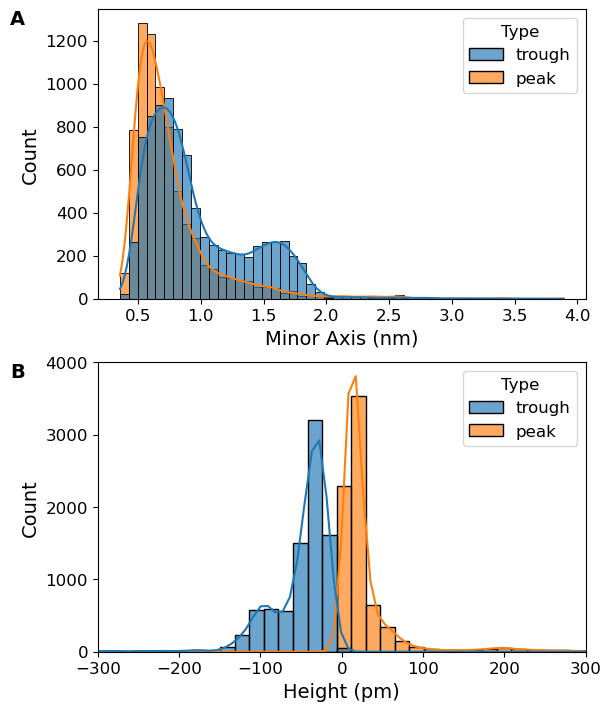

In [31]:
from matplotlib import rc
font = {"size": 12}
rc("font", **font)
hue = 'Type'

fig, axes = plt.subplots(2, 1, figsize=(6, 7), constrained_layout=True)

xs = [
    "Minor Axis (nm)",
    "Height (pm)",
]
xs_params = {
    "Height (pm)": {"bins": 100, "xlim": (-300, 300)},
}

row_labels = {
    1: 'B',
    0: 'A'
}

for i, (x_label, ax) in enumerate(zip(xs, axes.flat)):
    axis_label = x_label
    bins = 50
    xlim = None

    if x_label in xs_params:
        params = xs_params[x_label]

        axis_label = params["label"] if "label" in params else x_label
        bins = params["bins"] if "bins" in params else 50

        if "xlim" in params:
            xlim = params["xlim"]
            ax.set_xlim(xlim)

    ax.set_xlabel(axis_label, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

    g = sns.histplot(
        test_defect_properties,
        x=x_label,
        hue=hue,
        bins=bins,
        kde=True,
        alpha=0.66,
        fill=True,
        kde_kws={
            # 'fill':True,
            # 'bw_adjust': 0.15,
        },
        line_kws={
            "linewidth": 1.5,
        },
        # palette=sns.color_palette("tab10"),
        ax=ax,
    )

    ax.text(-0.18, 1.0, f'{row_labels[i]}',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='Black', fontsize=14, weight='bold',
    )
    # ax.legend(
    #     # ncol=2,
    #     title="Defect Clusters",
    #     loc="upper right",
    #     title_fontsize=12,
    #     fontsize=12,
    #     labels=[4, 3, 2, 1],
    # )

plt.savefig(
    plot_out_path + "/defect_ma-Z_hist-kde_all-data_raw.svg",
    bbox_inches="tight",
    format="svg",
)

plt.savefig(
    plot_out_path + '/defect_ma-Z_hist-kde_all-data_raw.tiff', 
    bbox_inches="tight", 
    format='tiff', 
    dpi=900
)
plt.show()

In [ ]:
font = {"size": 12}
mpl.rc("font", **font)

In [192]:
test_defect_properties['fcm'] = test_defect_properties['fcm'].astype(int)

C:\Users\da935101\AppData\Local\Temp\ipykernel_22132\3688760101.py:7: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.

C:\Users\da935101\AppData\Local\Temp\ipykernel_22132\3688760101.py:20: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



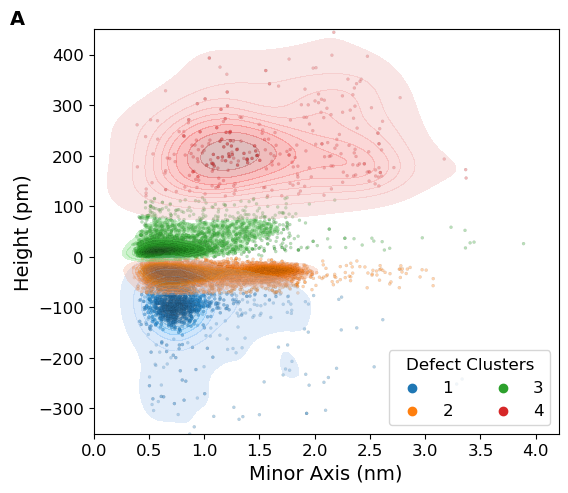

In [333]:
hue = 'fcm'
x_label = "Minor Axis (nm)"
y_label = "Height (pm)"
scale = 1.5
fig, ax = plt.subplots(figsize=(scale*4,scale*3.5))

sns.scatterplot(
    # ax=ax,
    data=test_defect_properties,
    x=x_label,
    y=y_label,
    hue=hue,
    linewidth=0.1,
    s=5,
    edgecolor='black',
    alpha=0.33,
    palette=sns.color_palette("tab10"),
    # legend=False,
)
sns.kdeplot(
    # ax=ax,
    data=test_defect_properties,
    x=x_label,
    y=y_label,
    hue=hue,
    fill=True,
    alpha=0.33,
    # thresh=0.05,
    bw_adjust=1.2,
    common_norm = False,
    palette=sns.color_palette("tab10"),
)

ax = plt.gca()
ax.text(-0.18, 1.05, 'A',
    verticalalignment='top', horizontalalignment='left',
    transform=ax.transAxes,
    color='Black', fontsize=14, weight='bold',
)

plt.xlim(0)
# plt.ylim(-200,200)
plt.ylim(-350, 450)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(x_label, fontsize=14)
plt.ylabel(y_label, fontsize=14)

plt.legend(ncol=2, title="Defect Clusters", loc='lower right', title_fontsize=12, fontsize=12)
plt.savefig(plot_out_path + '/H-vs-ma_density-contour_FCM_all-data_raw_NO-MARGINALS.tiff', bbox_inches="tight", format='tiff', dpi=900)
plt.savefig(plot_out_path + '/H-vs-ma_density-contour_FCM_all-data_raw_NO-MARGINALS.svg', bbox_inches="tight", format='svg')

plt.show()

In [19]:
fcm_cluster = 1
sel = ['Minor Axis (nm)','Height (pm)', 'Area (nm)', 'Perimeter (nm)', 'Angle', 'Eccentricity', 'Solidity', 'Compactness','Aspect Ratio', 'nm_per_pixel']
test_defect_properties[test_defect_properties['fcm'] == fcm_cluster][sel].describe()

,Minor Axis (nm),Height (pm),Area (nm),Perimeter (nm),Angle,Eccentricity,Solidity,Compactness,Aspect Ratio,nm_per_pixel
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,0.816008,-118.158508,0.676906,3.001927,83.272004,0.535458,0.967669,0.851515,1.239218,0.054220
std,0.280252,81.106527,0.624845,1.055717,37.313350,0.153294,0.014258,0.050118,0.193454,0.017296
min,0.413975,-1098.405775,0.200272,1.667095,0.000000,0.129000,0.893204,0.700038,1.008421,0.048828
25%,0.660488,-114.054621,0.381768,2.362539,61.678545,0.422250,0.962529,0.832638,1.103083,0.048828
50%,0.752325,-99.754423,0.525713,2.776860,80.656124,0.530000,0.970588,0.866999,1.179122,0.048828
75%,0.880543,-88.708716,0.713766,3.276987,100.226219,0.648000,0.976667,0.886947,1.312858,0.048828
max,3.333934,-72.251707,9.136200,12.097871,179.529251,0.881000,1.000000,0.934499,2.117362,0.195312


In [20]:
fcm_cluster = 2
sel = ['Minor Axis (nm)','Height (pm)', 'Area (nm)', 'Perimeter (nm)', 'Angle', 'Eccentricity', 'Solidity', 'Compactness','Aspect Ratio', 'nm_per_pixel']
test_defect_properties[test_defect_properties['fcm'] == fcm_cluster][sel].describe()

,Minor Axis (nm),Height (pm),Area (nm),Perimeter (nm),Angle,Eccentricity,Solidity,Compactness,Aspect Ratio,nm_per_pixel
count,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000
mean,1.004748,-34.656117,1.066211,3.660702,86.224248,0.535333,0.968020,0.854413,1.246482,0.072293
std,0.427116,14.185013,0.889234,1.470874,51.079466,0.163798,0.013211,0.045821,0.206313,0.028721
min,0.360770,-72.134984,0.200272,1.667095,0.000000,0.000000,0.888517,0.700267,1.000000,0.048828
25%,0.658545,-43.823151,0.405312,2.455288,48.556779,0.414000,0.961451,0.833542,1.098358,0.048828
50%,0.863362,-32.881696,0.708699,3.236538,82.722763,0.532000,0.970000,0.866201,1.180835,0.048828
75%,1.339393,-24.392721,1.587868,4.805977,123.884851,0.657000,0.976589,0.886508,1.326350,0.097656
max,3.072483,-0.066339,8.392334,10.993027,179.975647,0.910000,1.000000,0.943865,2.417603,0.195312


In [21]:
fcm_cluster = 3
sel = ['Minor Axis (nm)','Height (pm)', 'Area (nm)', 'Perimeter (nm)', 'Angle', 'Eccentricity', 'Solidity', 'Compactness','Aspect Ratio', 'nm_per_pixel']
test_defect_properties[test_defect_properties['fcm'] == fcm_cluster][sel].describe()

,Minor Axis (nm),Height (pm),Area (nm),Perimeter (nm),Angle,Eccentricity,Solidity,Compactness,Aspect Ratio,nm_per_pixel
count,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000
mean,0.720060,20.393220,0.575722,2.835162,92.206400,0.637171,0.953138,0.801561,1.382923,0.055950
std,0.273486,17.498308,0.553169,0.974052,37.468419,0.154348,0.018508,0.054739,0.248249,0.020311
min,0.356840,0.069991,0.200272,1.667095,0.000000,0.072000,0.872340,0.700055,1.002573,0.048828
25%,0.546236,10.041568,0.296831,2.167227,71.141594,0.540000,0.941748,0.755941,1.188540,0.048828
50%,0.647810,15.217870,0.426769,2.593394,92.004402,0.661500,0.955789,0.804472,1.333471,0.048828
75%,0.794353,23.538349,0.655353,3.207935,113.211088,0.757000,0.966667,0.844330,1.530336,0.048828
max,3.889494,117.636394,13.122559,13.889199,179.932648,0.906000,0.994681,0.930579,2.367475,0.195312


In [22]:
fcm_cluster = 4
sel = ['Minor Axis (nm)','Height (pm)', 'Area (nm)', 'Perimeter (nm)', 'Angle', 'Eccentricity', 'Solidity', 'Compactness','Aspect Ratio', 'nm_per_pixel']
test_defect_properties[test_defect_properties['fcm'] == fcm_cluster][sel].describe()

,Minor Axis (nm),Height (pm),Area (nm),Perimeter (nm),Angle,Eccentricity,Solidity,Compactness,Aspect Ratio,nm_per_pixel
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,1.547393,221.523784,2.618661,5.872089,90.720602,0.582519,0.965672,0.832424,1.296116,0.076685
std,0.606075,71.203024,1.879574,2.187010,53.231366,0.151253,0.013746,0.049308,0.220914,0.027750
min,0.392897,120.372919,0.200272,1.736147,0.114340,0.112000,0.915592,0.700421,1.006322,0.048828
25%,1.101823,178.100200,1.190603,4.280927,44.468278,0.478000,0.956750,0.805359,1.138387,0.048828
50%,1.390878,203.982122,1.924038,5.573943,89.592873,0.585000,0.970292,0.844355,1.233274,0.097656
75%,2.062248,248.101475,3.943443,7.692344,133.627502,0.692500,0.975897,0.869953,1.386191,0.097656
max,3.369939,692.000062,10.547638,12.212285,179.837952,0.882000,0.989655,0.915363,2.123472,0.195312


In [135]:
image_crops, pred_crops, pred_var_crops = [], [], []
sel_paths = []
target_size = 64

for f in test_defect_properties['Crop Path'].values:
    image_crop, pred_crop, pred_var_crop = np.load(f+'.npy')
    n, m, k = image_crop.shape

    if ((n > 0) & (m > 0)):
        sel_paths.append(f)
        
        image_crop = cv2.resize(
            image_crop,
            dsize=(target_size, target_size),
            interpolation=cv2.INTER_CUBIC,
        )[:,:,0]

        pred_crop = cv2.resize(
            pred_crop,
            dsize=(target_size, target_size),
            interpolation=cv2.INTER_CUBIC,
        )

        pred_var_crop = cv2.resize(
            pred_var_crop,
            dsize=(target_size, target_size),
            interpolation=cv2.INTER_CUBIC,
        )
        
        image_crops.append(image_crop)
        pred_crops.append(pred_crop)
        pred_var_crops.append(pred_var_crop)

    # print(image_crop.shape, f)


len(image_crops), len(pred_crops), len(pred_var_crops)

(1219, 1219, 1219)

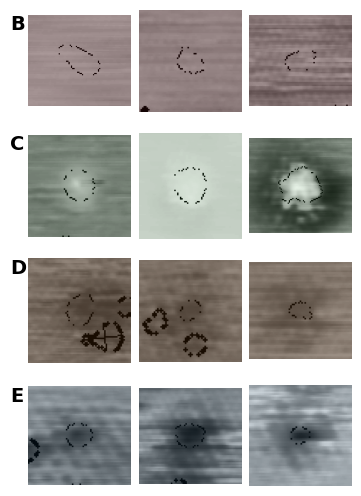

In [88]:
sel = ['Minor Axis (nm)','Height (pm)', 'Area (nm)', 'Perimeter (nm)', 'Angle', 'Eccentricity', 'Solidity', 'Compactness','Aspect Ratio', 'nm_per_pixel']
image_crops, pred_crops, pred_var_crops = [], [], []
sel_paths = []
row_labels = {
    4: 'B',
    3: 'C',
    2: 'D',
    1: 'E'
}

fig, axs = plt.subplots(4,3, figsize=(3.5,5), constrained_layout=True)

for fcm_cluster, row in zip([4,3,2,1], axs):
    if fcm_cluster == 1:
        t_height, t_ma = test_cluster_centers['fcm']['trough'][1, :]
    elif fcm_cluster == 2:
        t_height, t_ma = test_cluster_centers['fcm']['trough'][0, :]
    elif fcm_cluster == 3:
        t_height, t_ma = test_cluster_centers['fcm']['peak'][0, :]
    else:
        t_height, t_ma = test_cluster_centers['fcm']['peak'][1, :]

    # str_crop_df = test_defect_properties[test_defect_properties['fcm'] == fcm_cluster]
    str_crop_df = test_defect_properties.iloc[(test_defect_properties['Height (pm)']-t_height).abs().argsort()[:20]]
    # str_crop_df = str_crop_df.iloc[(str_crop_df['Height (pm)']-t_height).abs().argsort()[:10]]
    str_crop = str_crop_df['Crop Path'].values
    choice = np.random.choice(range(len(str_crop)), 3, replace=False)
    str_crop = str_crop[choice]

    for i, (f, ax) in enumerate(zip(str_crop, row)):
        target = np.load(f)
        image_crop, pred_crop, pred_var_crop = target
        # colored_square = np.ones_like(image_crop)
        # color_pallet = sns.color_palette("tab10")[fcm_cluster]

        r_ = np.full_like(image_crop[:,:,0], sns.color_palette("tab10")[fcm_cluster-1][0])
        g_ = np.full_like(image_crop[:,:,0], sns.color_palette("tab10")[fcm_cluster-1][1])
        b_ = np.full_like(image_crop[:,:,0], sns.color_palette("tab10")[fcm_cluster-1][2])
        colored_square = np.stack((r_,g_,b_), axis=2)

        ax.imshow(image_crop)
        ax.imshow(colored_square, alpha=0.1)
        ax.axis('off')
        # ax.text(0.5, 0.9, f'Cluster {fcm_cluster}',
        #     verticalalignment='top', horizontalalignment='center',
        #     transform=ax.transAxes,
        #     color='White', fontsize=12
        # )

        if i == 0:
            ax.text(-0.18, 1.0, f'{row_labels[fcm_cluster]}',
                verticalalignment='top', horizontalalignment='left',
                transform=ax.transAxes,
                color='Black', fontsize=14, weight='bold',
            )

        image_crops.append(image_crop)
        pred_crops.append(pred_crop)
        pred_var_crops.append(pred_var_crop)
    
axs_gallary = axs

# for i, ax in enumerate(axs.flatten()):
#     crop = image_crops[i][:,:,0]
#     ax.imshow(crop)
#     ax.axis('off')
#     ax.text(0.05, 0.99, f'Cluster {}',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='green', fontsize=15)

plt.savefig(
    f"output/training_detection_cluster_gallary.tiff",
    bbox_inches="tight",
    format="tiff",
    dpi=900,
)
plt.show()

c:\Users\da935101\Code\NanoscoPy-learn\classifier\predict.py:1126: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.

c:\Users\da935101\Code\NanoscoPy-learn\classifier\predict.py:1126: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.

c:\Users\da935101\Code\NanoscoPy-learn\classifier\predict.py:1126: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.

c:\Users\da935101\Code\NanoscoPy-learn\classifier\predict.py:1126: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



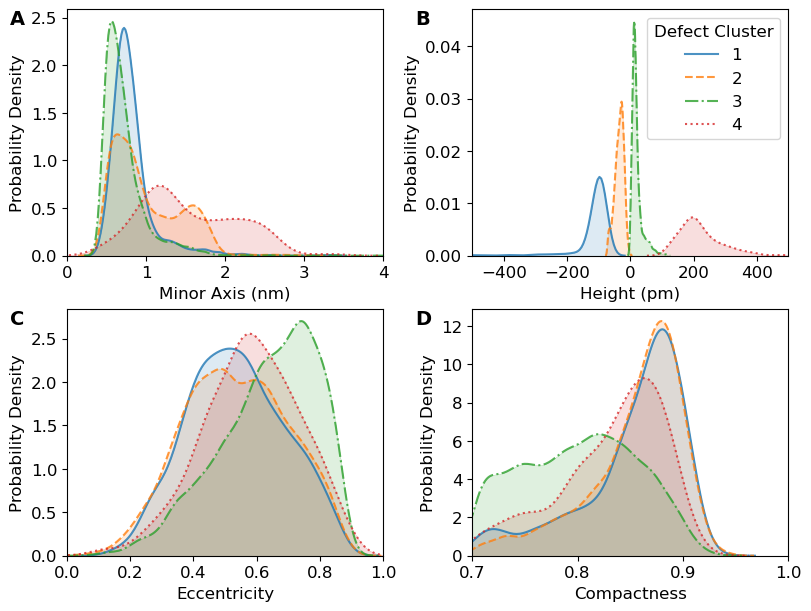

In [352]:
plot_detection_kdes(test_defect_properties, hue='fcm', save=True)

In [ ]:
plot_detection_hists(test_defect_properties, hue='fcm')

In [ ]:
plot_calc_defect_properties(test_defect_properties, hue='fcm')

In [ ]:
areas = []
filenames = []

for dir_path in dirs:
    date_str = Path(dir_path).name
    sxm_dataset = SXM_Dataset(dir_path, filename_filter="STM")
    total_area_nm, path = get_total_area(sxm_dataset)

    areas.append(total_area_nm)
    filenames.append(path)

total_scan_area_nm = np.array(areas).sum()

In [195]:
paths = test_defect_properties['Filename'].unique()

In [196]:
unique_files = SXM_Dataset(root = "", paths = paths, filename_filter="STM")

259 sxm files found in 


In [197]:
areas, filenames = get_total_area(unique_files)

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

c:\Users\da935101\AppData\Local\miniconda3\envs\ml-stm\lib\site-packages\spiepy\flatten.py:54: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions

In [198]:
total_scan_area_nm = np.array(areas).sum()

In [199]:
total_scan_area_cm = total_scan_area_nm * 1e-14
total_scan_area_cm

In [ ]:
n_total = len(test_defect_properties)
n_total

In [201]:
total_density_cm = n_total/total_scan_area_cm
f'{total_density_cm:0.2e}'

'1.29e+12'

In [ ]:
out = test_defect_properties['fcm'].value_counts()

In [ ]:
for i in range(len(out)):
    print(f'cluster {i+1}: ', out[i+1], f'{out[i+1]/n_total:0.2}', f'{out[i+1]/total_scan_area_cm:0.2e}')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(cum_area, cum_counts)
ax.axline((0, 0), (total_scan_area_cm, n_total), linestyle='--', color='black', label='1.14e12 cm$^{-2}$')
ax.axline((0, 0), slope=1.46e12, linestyle='--', color='red', label='1.46e12  cm$^{-2}$')
plt.xlabel('Cummulative Area (cm$^2$)')
plt.ylabel('Cummulative Count')
plt.legend()
plt.show()

## Test trained UNet on un-seen STM/cAFM images

In [23]:
cAFM_path = dialog_askfilename()

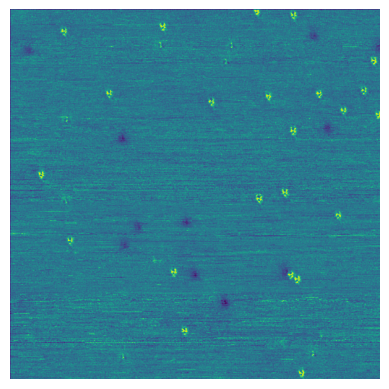

In [37]:
from PIL import Image
import PIL.ImageOps

image = Image.open(cAFM_path).convert("L")
# image = Image.open(cAFM_path)
# image = cv2.imread(cAFM_path, 0)
image = image.resize((512, 512))
# image = image.resize((1024, 1024))
# image = image.resize((2048, 2048))
# inv_image = PIL.ImageOps.invert(image)
# inv_image = np.array(inv_image)
image = np.array(image)

plt.imshow(image)
plt.axis("off")
plt.show()

In [38]:
img_n, img_m = image.shape
img_n, img_m

(512, 512)

In [39]:
predictor = aoi.predictors.EnsemblePredictor(
    smodel, ensemble, nb_classes=3, output_shape=(1, 3, img_n, img_m)
)

In [27]:
scan_width_nm = 50
thresh = 0.0

Batch 1/1

C:\Users\da935101\AppData\Local\Temp\ipykernel_22144\3721937688.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet_cmap = mpl.cm.get_cmap("plasma")


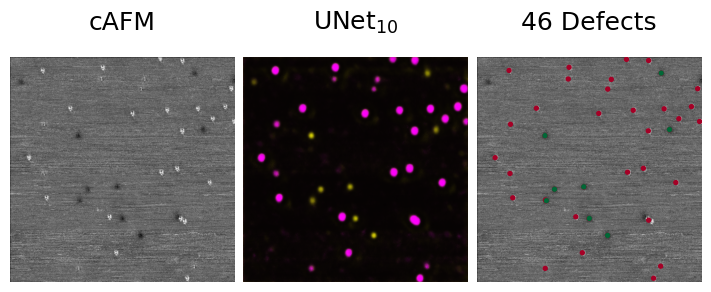

In [45]:
nn_output, nn_out_var = predictor.predict(image)
pred = nn_output.squeeze()
pred[:, :, 0] = 1 - pred[:, :, 0]

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 6), constrained_layout=True)

ax1.imshow(image, cmap="gray")
ax1.set_title("cAFM", fontsize=18, pad=20)
ax1.axis("off")

ax2.imshow(pred)
ax2.set_title("UNet$_{10}$", fontsize=18, pad=20)
ax2.axis("off")

coordinates = Locator(thresh=thresh, dist_edge=0, refine=False, d=None).run(
    nn_output
)
coords = coordinates[0]
fsize = 12
cmap_ = "RdYlGn"
y, x, c = coords.T
ax3.imshow(image, cmap="gray")
ax3.scatter(x, y, c=c, cmap=cmap_, s=8)
ax3.set_title(f"{len(coords)} Defects", fontsize=18, pad=20)
ax3.axis("off")


jet_cmap = mpl.cm.get_cmap("plasma")
norm = mpl.colors.Normalize(0, 9)
plot_visible = False
true_counts = []
counts = []
areas = []
defected_pixels = []
total_pixels = []
pred_densities = []
com_densities = []
true_densities = []

defect_areas = {"trough": [], "peak": []}
defect_radius = {"trough":[], "peak": []}
defect_parem = {"trough": [], "peak": []}

defect_g_r = []
defect_radii = []

filename = cAFM_path
filename_parts = filename.split("_")

pred = nn_output.squeeze()
count = len(coordinates[0])
counts.append(count)


n_defected_pixels = len(pred[pred > thresh])
w, h, z = pred.shape
n_total_pixels = w * h
defected_ratio = n_defected_pixels / n_total_pixels
nm_per_pixel = float(scan_width_nm) / w
scan_area_nm = float(scan_width_nm) ** 2
scan_area_cm = scan_area_nm * 1e-14
pred_density = 1 / (defected_ratio * scan_area_cm)
com_density = count / scan_area_cm
# print(defected_ratio*100, f'{pred_density:.2e}', f'{true_density:.2e}', f'{precent_diff:.2f}')
defected_pixels.append(n_defected_pixels)
total_pixels.append(n_total_pixels)
pred_densities.append(pred_density)
com_densities.append(com_density)

defect_widths, defect_lengths = [], []

ch_pred = nn_output[:, :, :, [2, 0]]
loc = Locator(thresh, dist_edge=0, refine=False, d=None)
coordinates = loc.run(ch_pred, image)
coords = coordinates[0]


norm_pred = cv2.normalize(pred, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)
swap_pred = np.swapaxes(norm_pred, 0, 2)
for channel, label in zip(swap_pred[1:], ["trough", "peak"]):

    ret, thresh_pred = cv2.threshold(
        channel, thresh, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    contours = cv2.findContours(thresh_pred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
    cnt_areas = []
    cnt_perms = []
    for contour in contours:
        area = cv2.contourArea(contour)
        area_nm = area * nm_per_pixel

        radius = 2 * np.sqrt(area / np.pi)
        radius_nm = radius * nm_per_pixel

        perimeter = cv2.arcLength(contour, True)
        perimeter = round(perimeter, 4)
        perimeter_nm = perimeter * nm_per_pixel
        defect_areas[label].append(area_nm)
        defect_radius[label].append(radius_nm)
        defect_parem[label].append(perimeter_nm)
        cv2.drawContours(norm_pred, contour, -1, (0, 255, 0), 3)

plt.savefig(
    f"output/plots/CAFM example.tiff",
    bbox_inches="tight",
    format="tiff",
    dpi=900,
)
plt.show()


In [251]:
peaks_df = pd.DataFrame(defect_radius['peak'], columns=["radius"])
troughs_df = pd.DataFrame(defect_radius['trough'], columns=["radius"])

# remove radii small than Se or W atoms (<= 210 pm)
cleaned_troughs_df = troughs_df[troughs_df["radius"] > 0.21]
cleaned_peaks_df = peaks_df[peaks_df["radius"] > 0.21]

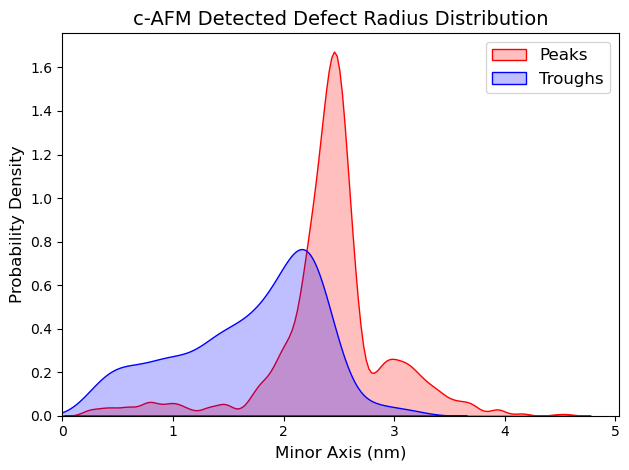

In [252]:
fig, ax = plt.subplots()

sns.kdeplot(
    cleaned_peaks_df["radius"],
    ax=ax,
    bw_adjust=0.5,
    color="red",
    label="Peaks",
    # alpha=0.2,
    fill=True,
)
sns.kdeplot(
    cleaned_troughs_df["radius"],
    ax=ax,
    bw_adjust=0.8,
    color="blue",
    label="Troughs",
    fill=True,
)

plt.xlim(0)
plt.ylabel('Probability Density', fontsize=12)
plt.xlabel('Minor Axis (nm)', fontsize=12)
plt.title('c-AFM Detected Defect Radius Distribution', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [253]:
metadata = (cAFM_path, 250, (250/2048), 300)
defect_properties_list, pred, pred_var = detect_defects(image, predictor, metadata=metadata)
test_defect_properties = pd.DataFrame(defect_properties_list)

Batch 1/1

In [254]:
len(test_defect_properties)

1368